# WD Database for Python

The goal is to download the following database: http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J%2FMNRAS%2F455%2F3413 for use in a machine-learning inspired scheme to 

In [1]:
#Preamble. Standard packages for to load
import astropy
from astropy.table import Table, Column, MaskedColumn
import numpy as np
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt
import urllib2
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
from astroquery.sdss import SDSS
from astropy import units as u
from astropy import coordinates as coords
from astropy.io import fits
import os
import random

/Users/joshuapaultan/anaconda/lib/python2.7/site-packages/astroquery/sdss/__init__.py:28: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [2]:
catalog_list = Vizier.find_catalogs('New white dwarf SDSS DR12')

In [3]:
print({k:v.description for k,v in catalog_list.items()})

{u'J/MNRAS/455/3413': u'New white dwarf and subdwarf stars in SDSS DR12 (Kepler+, 2016)'}


In [4]:
Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list.keys())

In [5]:
print(catalogs)

TableList with 1 tables:
	'0:J/MNRAS/455/3413/table6' with 34 column(s) and 6647 row(s) 


In [6]:
catalogs[0]

_RAJ2000,_DEJ2000,PMF,SDSS,S_N,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,E_B-V_,pm,GLON,GLAT,SpType,Teff,e_Teff,logg,e_logg,Teff_3D_,e_Teff_3D_,logg_3D_,e_logg_3D_,Mass,e_Mass,Com,Sp,_RA.icrs,_DE.icrs
deg,deg,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mas / yr,deg,deg,,K,K,[cm/s2],[cm/s2],K,K,[cm/s2],[cm/s2],Msun,Msun,,,deg,deg
float64,float64,str15,str19,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str9,int32,int32,float32,float32,int32,int32,float32,float32,float64,float64,str18,str2,float64,float64
192.8436,-2.6717,0337-51997-0195,125122.06-023737.21,22,18.120,0.019,17.570,0.020,17.549,0.013,17.572,0.017,17.601,0.023,0.021,5.100,302.9,60.2,sdB,29108,463,5.409,0.087,--,--,--,--,--,--,,Sp,192.8436,-2.6717
232.7803,55.0191,0614-53437-0049,153112.62+550139.60,22,17.615,0.015,17.827,0.018,18.315,0.016,18.672,0.020,18.964,0.041,0.018,8.300,88.1,49.9,sdB,29876,374,5.292,0.080,--,--,--,--,--,--,,Sp,232.7803,55.0191
221.7148,58.1535,0790-52346-0634,144657.14+580920.12,46,15.839,0.014,15.671,0.013,15.667,0.020,15.702,0.017,15.759,0.016,0.010,3.900,97.9,53.0,sdB,30893,165,5.033,0.032,--,--,--,--,--,--,,Sp,221.7148,58.1535
117.3776,28.0867,1059-52618-0515,074915.66+280641.01,11,18.910,0.021,19.100,0.025,19.519,0.022,19.863,0.032,20.149,0.109,0.035,4.600,192.5,24.3,sdB,29404,704,5.450,0.142,--,--,--,--,--,--,,Sp,117.3776,28.0867
326.6084,-7.2167,1177-52824-0636,214627.88-071117.59,45,16.163,0.014,15.937,0.027,15.864,0.012,15.856,0.013,15.905,0.017,0.035,7.000,48.6,-41.9,sdB,30503,191,5.019,0.036,--,--,--,--,--,--,,Sp,326.6084,-7.2167
63.9077,25.6175,1254-52972-0163,041536.05+253857.11,41,16.143,0.015,16.269,0.015,16.458,0.010,16.646,0.011,16.832,0.016,0.483,6.100,170.4,-17.9,He-sdO,64329,1429,6.118,0.073,--,--,--,--,--,--,,Sp,63.9077,25.6175
251.2279,21.5942,1569-53168-0370,164453.35+213711.54,20,17.752,0.017,17.819,0.013,18.218,0.011,18.552,0.012,18.807,0.037,0.050,3.000,40.5,37.0,sdB,26349,889,5.114,0.104,--,--,--,--,--,--,,Sp,251.2279,21.5942
244.9250,24.1559,1574-53476-0225,161942.83+240715.70,46,16.792,0.022,16.420,0.023,16.462,0.016,16.481,0.013,16.570,0.018,0.067,11.900,41.5,43.3,sdB,27741,342,5.227,0.048,--,--,--,--,--,--,,Sp,244.9250,24.1559


In [7]:
catalogs[0]['Coordinates'] = coords.SkyCoord(catalogs['J/MNRAS/455/3413/table6']['_RAJ2000'], catalogs['J/MNRAS/455/3413/table6']['_DEJ2000'], frame='icrs')

In [8]:
PMF = catalogs[0]['PMF']
catalogs[0]['plate'] = MaskedColumn(length=len(catalogs[0]),dtype='int32')
catalogs[0]['mjd'] = MaskedColumn(length=len(catalogs[0]),dtype='int32')
catalogs[0]['fiber'] = MaskedColumn(length=len(catalogs[0]),dtype='int32')


for ind,obj in enumerate(PMF):
    split_PMF = obj.split('-')
    catalogs[0]['plate'][ind] = split_PMF[0]
    catalogs[0]['mjd'][ind] = split_PMF[1]
    catalogs[0]['fiber'][ind] = split_PMF[2]

In [9]:
WD = catalogs[0]

WD

_RAJ2000,_DEJ2000,PMF,SDSS,S_N,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,E_B-V_,pm,GLON,GLAT,SpType,Teff,e_Teff,logg,e_logg,Teff_3D_,e_Teff_3D_,logg_3D_,e_logg_3D_,Mass,e_Mass,Com,Sp,_RA.icrs,_DE.icrs,Coordinates,plate,mjd,fiber
deg,deg,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mas / yr,deg,deg,,K,K,[cm/s2],[cm/s2],K,K,[cm/s2],[cm/s2],Msun,Msun,,,deg,deg,"deg,deg",,,
float64,float64,str15,str19,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str9,int32,int32,float32,float32,int32,int32,float32,float32,float64,float64,str18,str2,float64,float64,object,int32,int32,int32
192.8436,-2.6717,0337-51997-0195,125122.06-023737.21,22,18.120,0.019,17.570,0.020,17.549,0.013,17.572,0.017,17.601,0.023,0.021,5.100,302.9,60.2,sdB,29108,463,5.409,0.087,--,--,--,--,--,--,,Sp,192.8436,-2.6717,"192.8436,-2.6717",337,51997,195
232.7803,55.0191,0614-53437-0049,153112.62+550139.60,22,17.615,0.015,17.827,0.018,18.315,0.016,18.672,0.020,18.964,0.041,0.018,8.300,88.1,49.9,sdB,29876,374,5.292,0.080,--,--,--,--,--,--,,Sp,232.7803,55.0191,"232.7803,55.0191",614,53437,49
221.7148,58.1535,0790-52346-0634,144657.14+580920.12,46,15.839,0.014,15.671,0.013,15.667,0.020,15.702,0.017,15.759,0.016,0.010,3.900,97.9,53.0,sdB,30893,165,5.033,0.032,--,--,--,--,--,--,,Sp,221.7148,58.1535,"221.7148,58.1535",790,52346,634
117.3776,28.0867,1059-52618-0515,074915.66+280641.01,11,18.910,0.021,19.100,0.025,19.519,0.022,19.863,0.032,20.149,0.109,0.035,4.600,192.5,24.3,sdB,29404,704,5.450,0.142,--,--,--,--,--,--,,Sp,117.3776,28.0867,"117.3776,28.0867",1059,52618,515
326.6084,-7.2167,1177-52824-0636,214627.88-071117.59,45,16.163,0.014,15.937,0.027,15.864,0.012,15.856,0.013,15.905,0.017,0.035,7.000,48.6,-41.9,sdB,30503,191,5.019,0.036,--,--,--,--,--,--,,Sp,326.6084,-7.2167,"326.6084,-7.2167",1177,52824,636
63.9077,25.6175,1254-52972-0163,041536.05+253857.11,41,16.143,0.015,16.269,0.015,16.458,0.010,16.646,0.011,16.832,0.016,0.483,6.100,170.4,-17.9,He-sdO,64329,1429,6.118,0.073,--,--,--,--,--,--,,Sp,63.9077,25.6175,"63.9077,25.6175",1254,52972,163
251.2279,21.5942,1569-53168-0370,164453.35+213711.54,20,17.752,0.017,17.819,0.013,18.218,0.011,18.552,0.012,18.807,0.037,0.050,3.000,40.5,37.0,sdB,26349,889,5.114,0.104,--,--,--,--,--,--,,Sp,251.2279,21.5942,"251.2279,21.5942",1569,53168,370
244.9250,24.1559,1574-53476-0225,161942.83+240715.70,46,16.792,0.022,16.420,0.023,16.462,0.016,16.481,0.013,16.570,0.018,0.067,11.900,41.5,43.3,sdB,27741,342,5.227,0.048,--,--,--,--,--,--,,Sp,244.9250,24.1559,"244.925,24.1559",1574,53476,225


In [10]:
directory = 'data/'
WD['file'] = MaskedColumn(length=len(catalogs[0]),dtype='S32')
for ind,plate in enumerate(catalogs[0]['plate']):
    try:
        spec = SDSS.get_spectra_async(plate=plate, mjd=WD['mjd'][ind], fiberID=WD['fiber'][ind])
        url_of_interest = str(spec[0]).split()[4]
        filename = directory+url_of_interest.split('/')[-1]       
    except:
        print "No spectra found in database:", plate, WD['mjd'][ind], WD['fiber'][ind]
        pass
    if os.path.exists(filename): 
        WD['file'][ind] = filename
        continue
    try:
        spec = SDSS.get_spectra(plate=plate, mjd=WD['mjd'][ind], fiberID=WD['fiber'][ind])
        spec[0].writeto(filename)
        WD['file'][ind] = filename
    except:
        print "Could not download spectra:", plate, WD['mjd'][ind], WD['fiber'][ind]
        pass  

No spectra found in database: 3771 55544 870
No spectra found in database: 6685 56412 620
No spectra found in database: 6686 56412 868


No spectra found in database: 7120 56720 894


In [11]:
def get_filename(plate,mjd,fiber,wd):
    try:
        plwd = wd[wd['plate'] == plate]
        if len(plwd) == 0: raise Exception()
    except Exception:
        print 'No plate number'
        return ''
    try:
        mjwd = plwd[plwd['mjd'] == mjd]
        if len(mjwd) == 0: raise Exception()
    except Exception:
        print 'No mjd date'
        return ''
    try:
        fbwd = mjwd[mjwd['fiber'] == fiber]
        if len(fbwd) == 0: raise Exception()
    except Exception:
        print 'No fiber number'
        return ''
    name = fbwd['file']
    return str(name[0])

In [12]:
def plot_spec(plate,mjd,fiber,wd):
    fits_spec = fits.open(get_filename(plate,mjd,fiber,wd))
    wavelength = 10**fits_spec[1].data['loglam']
    flux = fits_spec[1].data['flux']
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    ax[0].plot(wavelength, flux)
    ax[1].plot(wavelength, flux)
    ax[1].set_xlim(3800, 4400)
    plt.show()

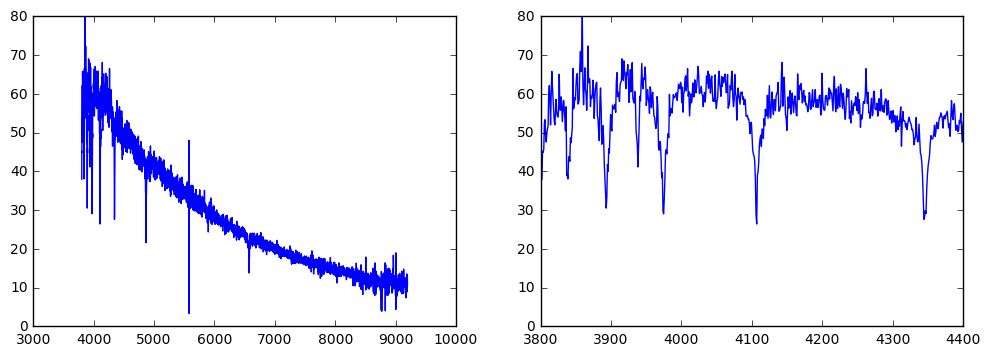

In [13]:
plot_spec(337,51997,195,WD)

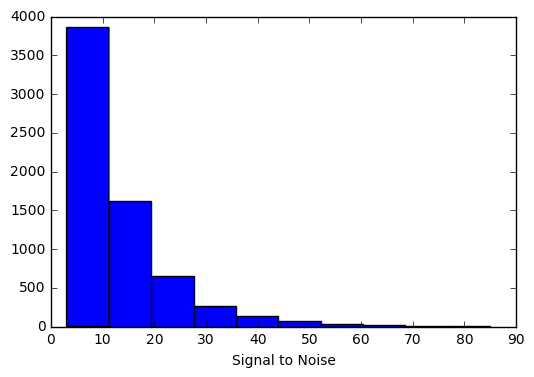

In [14]:
plt.hist(WD['S_N'])
plt.xlabel('Signal to Noise')

### Let's select a quality sample of WD spectra

In [15]:
print("We start with", len(WD), "WDs")

# First, we want to remove systems with NaN's - only found in log g
good_WD = WD[np.where(~np.isnan(WD['logg']))]
print("We removed", len(WD[np.isnan(WD['logg'])]), "systems with NaNs")

# Now, we want to remove systems in which the log g was assumed. These all have e_logg=0.0
good_WD = good_WD[good_WD['e_logg'] != 0.0]
print("Number with determined log g",len(good_WD))

# Next, we only want objects with a S/N above 10
good_WD = good_WD[good_WD['S_N']>10]
print("Number with S/N > 10",len(good_WD))

# Next, we want objects with log g uncertainties smaller than, say, 0.2
good_WD = good_WD[good_WD['e_logg']<0.2]
print("Number with log g error less than 0.2",len(good_WD))

# # Let's do the same with T_eff uncertainties - limit to 15% of T_eff
# good_WD = good_WD[good_WD['e_Teff']<0.15*good_WD['Teff']]
# print("Number with Teff uncertainties less than 15%",len(good_WD))

# Print the median Teff error
print("Median T_eff error:", np.median(good_WD['e_Teff']))

# Print the median log g error
print("Median log g error:", np.median(good_WD['e_logg']))

('We start with', 6647, 'WDs')
('We removed', 26, 'systems with NaNs')
('Number with determined log g', 5941)
('Number with S/N > 10', 2964)
('Number with log g error less than 0.2', 2634)
('Median T_eff error:', 53.0)
('Median log g error:', 0.1080000028014183)


### Create training, test, and validation sets

In [16]:
# Randomly shuffle indices
indices = np.arange(len(good_WD))
np.random.shuffle(indices)
good_shuffle_WD = good_WD[indices]

# Determine training, test, and validation sets
validation_WD = good_shuffle_WD[0:300]
test_WD = good_shuffle_WD[300:600]
training_WD = good_shuffle_WD[600:]

### Plot up systems in T_eff and log g space to see where they lie

/Users/joshuapaultan/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
/Users/joshuapaultan/anaconda/lib/python2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


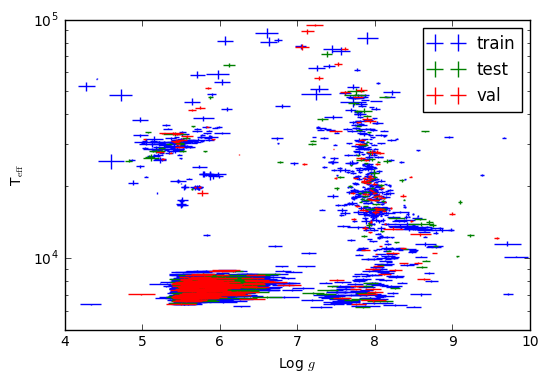

In [17]:
plt.errorbar(training_WD['logg'], training_WD['Teff'], xerr=training_WD['e_logg'], 
             yerr=training_WD['e_Teff'], ls='none', fmt='', capsize=0, label='train')

plt.errorbar(test_WD['logg'], test_WD['Teff'], xerr=test_WD['e_logg'], 
             yerr=test_WD['e_Teff'], ls='none', fmt='', capsize=0, label='test')

plt.errorbar(validation_WD['logg'], validation_WD['Teff'], xerr=validation_WD['e_logg'], 
             yerr=validation_WD['e_Teff'], ls='none', fmt='', capsize=0, label='val')
plt.legend()


plt.ylabel(r'T$_{\rm eff}$')
plt.xlabel(r'Log $g$')

plt.yscale('log')
plt.ylim(5.0e3, 1.0e5)

plt.show()